<font size="5"> **The Prediction of heart disease based on symptoms and patient characteristics** </font>

<font size= "3"> DSCI 100 section 010 group 22:  Emily Chen, Mehakpreet Dhaliwal, Haoxi Jiang, Manika Mohinani.  </font>

<font size= "4"> **Introduction** </font>

Heart disease, a term used to refer to several types of heart conditions, is one of the leading causes of death worldwide. Factors including lifestyle, genetic predisposition, and age, can influence an individual’s likelihood of developing heart disease. By understanding the interplay between these contributors, global healthcare agencies can work towards the improvement of early detection and prevention strategies. According to health authorities and research, age, cholesterol levels, heart rate, and blood pressure are significant factors and observations in the diagnosis of heart disease (“Heart Disease”, 2020). We aim to address the question “Can we create a model to predict whether an individual in Cleveland is likely to have heart disease based on specific symptoms and biology of patients?” We utilized the processed Cleveland data from the dataset ‘Heart Disease’ provided by ‘UC Irvine Machine Learning Repository’, focusing on variables that are reportedly significant in diagnosis of heart disease to answer the following research question: Can we create a model to predict whether an individual is likely to have heart disease based on the patient symptoms and their various characteristics?

<font size= "3"> Research question: Can we create a model to predict whether an individual is likely to have heart disease based on the patient symptoms and their various characteristics? </font>

<font size= "4"> **Method**  </font>

We first selected relevant numerical variables that are known contributors or with established association with heart disease. The numerical variables used in this study are age, cholesterol level, resting blood pressure, and maximum heart rate. 

To explore our data, we created visualizations to showcase the relationship between different combinations of these variables. These variables were then adapted as predictors into a classification model to predict the type of heart disease (target). We first explored the prediction model using pairs of predictors, using cholesterol and resting heart rate, and then cholesterol and age. Cholesterol was used in both pairs of predictors, because cholesterol level is known as a predominant factor in heart disease, hence it was logical to explore it as an important predictor (“5 Heart Numbers You Need to Know”, n.d.).

For our classification model, we used the K-nearest neighbor classification algorithm to predict the type of heart disease using pairs and combinations of variables and assessed the effectiveness of our models through cross-validation for a 10-fold test and then evaluated each model using metrics and calculating precision, accuracy, and recall, and found the optimal K value that offers the greatest accuracy


<font size= "4"> **Data analysis** </font>

<font size= "3">  **Step 1:** Reading the dataset and creating the training data 

<font size= "3">  In this step, we downloaded the heart disease dataset from the website, then use the read_csv function to read the data and labling the variables. Then we seperated 75% of the data as training data set and the rest as testing data set. </font>

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
destination_dir <- "heart_disease_dataset"
download.file(url, destfile = "heart_disease.zip", mode = "wb")
unzip("heart_disease.zip", exdir = destination_dir)
list.files(destination_dir)

[1] "ask-detrano"                "bak"                       
 [3] "cleve.mod"                  "cleveland.data"            
 [5] "costs"                      "heart-disease.names"       
 [7] "hungarian.data"             "Index"                     
 [9] "long-beach-va.data"         "new.data"                  
[11] "processed.cleveland.data"   "processed.hungarian.data"  
[13] "processed.switzerland.data" "processed.va.data"         
[15] "reprocessed.hungarian.data" "switzerland.data"          
[17] "WARNING"

In [3]:
heart_data_rough <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, na.strings = c("", "?"))
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target")
heart_data <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, col.names = column_names, na.strings = c("", "?", "NA"))
heart_data_clean <- heart_data |>
mutate(target = as_factor(target))
head(heart_data_clean)
tail(heart_data_clean)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
298,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
299,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
301,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
303,38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


In [4]:
set.seed(123)
heart_disease_split <- initial_split(heart_data_clean, prop = 0.75, strata = target)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

<font size= "4"> **Step 2.0:** Predicting heart disease type by cholesterol levels, and blood pressure </font>

<font size= "3"> **Step 2.1:** To explore the dataset, the visualization of the numerical variables helps understand the distribution of the variables including age, blood pressure (trestbps), cholesterol (chol), etc. This can help identify any patterns or anomalies in the data. We then created a summary table with the mean values before coding the scatter plot. This helps provide an initial understanding of the dataset. It allows for a quick grasp of the central inclination of numerical variables across the different groups defined by the target variable. Essentially it provides a clear overview of the dataset’s characteristics and helps set the stage for further exploration with the actual scatter plot.</font>

<font size= "3">  The first graph created is a visualization of the relationship between cholesterol levels and resting blood pressure in the context of heart disease. The first plot shows the relationship of the variables with each data point colored to a different type of heart disease whereas the second plot shows the relationship of the variables for each type of heart disease separately. By having separate facets for each heart disease type, it allows for a direct comparison of the variables, and the ability to recognize consistent patterns or differences in the relationships. </font>

In [5]:
table_data <- heart_disease_train |>
select("chol", "trestbps", "target")

# number of obs
num_obs <- nrow(table_data)
heart_disease_obs <- table_data |> 
group_by(target) |>
summarise(count = n(),
         percentage = n()/num_obs*100)


# Resting bp and cholesterol relationship
heart_cp_chol <- table_data |>
group_by(target) |>
summarise(mean_trestbps = mean(trestbps), 
          mean_chol = mean(chol))
heart_cp_chol 

heart_cp_chol_chart <- table_data |>
group_by(target) |>
summarise(across(c(chol, trestbps)))

target,mean_trestbps,mean_chol
<fct>,<dbl>,<dbl>
0,128.9836,244.6967
1,133.6341,245.2683
2,136.6923,256.0000
3,134.3846,247.5769
4,142.7000,250.6000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


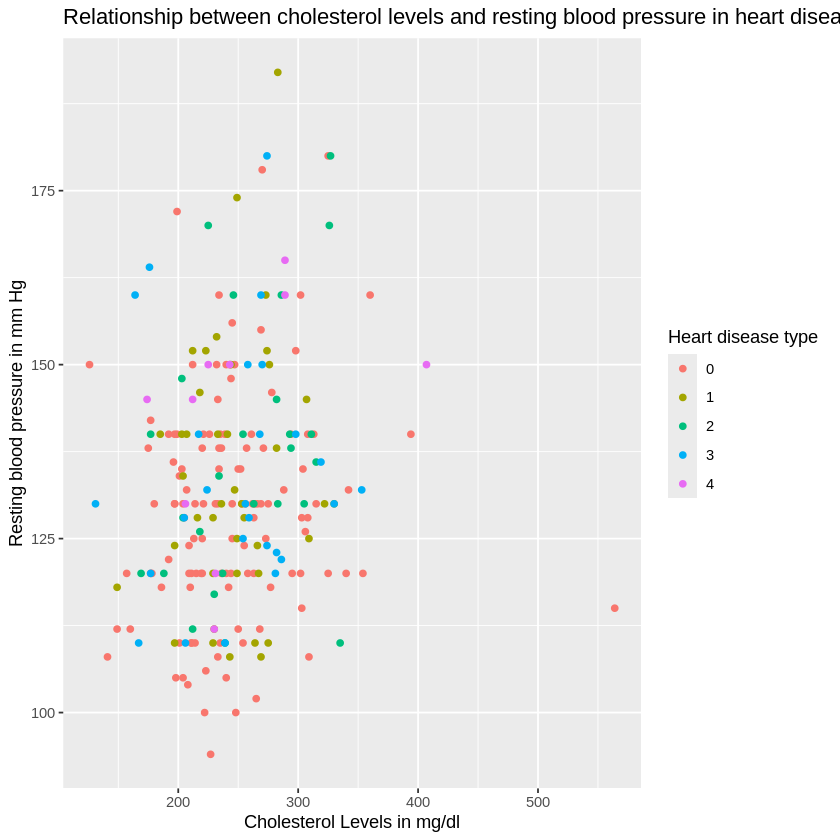

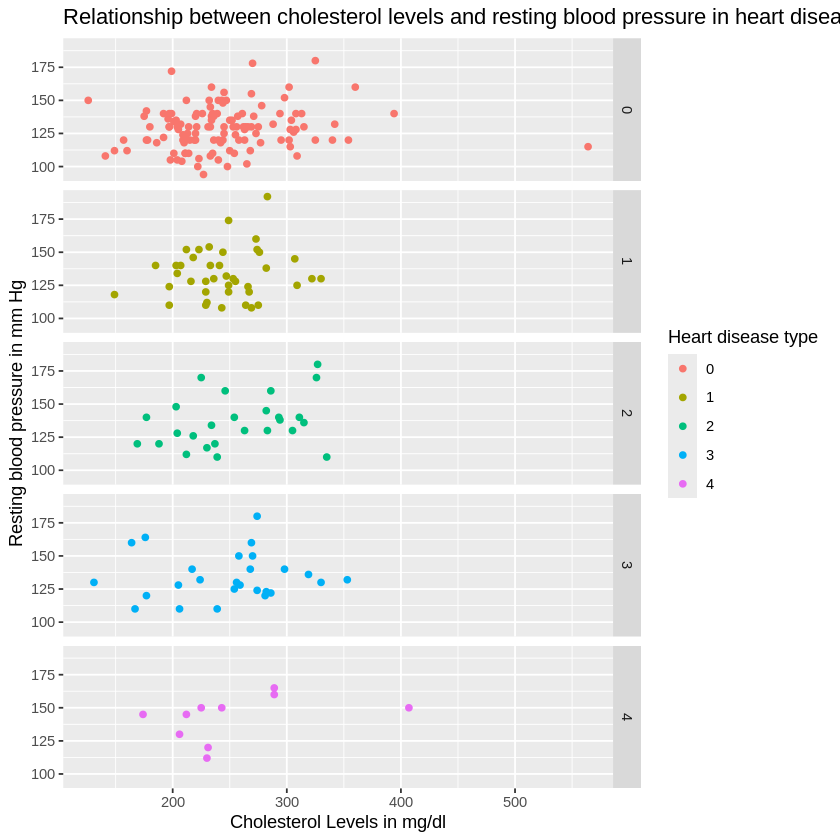

In [6]:
# Resting bp and cholesterol relationship plot
heart_cp_bp_plot<- ggplot(heart_cp_chol_chart, aes(x = chol, y= trestbps, color= target)) +
geom_point()+labs(x = "Cholesterol Levels in mg/dl", 
                  y = "Resting blood pressure in mm Hg", 
                  title = "Relationship between cholesterol levels and resting blood pressure in heart disease", 
                  color = "Heart disease type")
heart_cp_bp_plot

heart_cp_bp_many<- ggplot(heart_cp_chol_chart, aes(x = chol, y= trestbps, color= target)) +
geom_point()+labs(x = "Cholesterol Levels in mg/dl", 
                  y = "Resting blood pressure in mm Hg", 
                  title = "Relationship between cholesterol levels and resting blood pressure in heart disease", 
                  color = "Heart disease type")+
facet_grid(rows=vars(target))
heart_cp_bp_many

**Graph analysis:** As we can see from the first graph, there is not really a pattern in the plot. However, we can see that in the second graph, there are much more heart disease type 0 than other heart disease types. Overall there does not appear to have a strong, clear-cut correlation between the resting blood presure and the cholesterol levels in heart disease tpyes. 

<font size = 3>**Step 2.2:** We then built a code evaluating a k-nearest neighbor (KNN) classification model for predicting heart disease type based on the resting blood pressure and cholesterol levels. The estimated accuracy of this model is approximately 42.31%. This accuracy level indicates that the model correctly predicts the heart disease status for about 42 out of every 100 cases. The model might cause false negative results and fail to identify patients who actually have heart disease, potentially leading to a lack of necessary medical intervention. </font>

In [7]:
# K-nn spec and fitting- chol
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
set_engine("kknn")|>
set_mode("classification")


heart_recipe <- recipe(target~ trestbps+chol, data = table_data)|>
step_scale(all_predictors())|>
step_center(all_predictors())

heart_fit <- workflow()|>
add_recipe(heart_recipe)|>
add_model(knn_spec)|>
fit(data= table_data)


# Predict class labels for our test set- chol
heart_test_predictions <- predict(heart_fit, heart_disease_test) |>
       bind_cols(heart_disease_test)

prediction_accuracy <- heart_test_predictions |>
         metrics(truth = target, estimate = .pred_class) 
prediction_accuracy

heart_mat <- heart_test_predictions |> 
       conf_mat(truth = target, estimate = .pred_class)

heart_test_predictions |>
  precision(truth = target, estimate = .pred_class, event_level = "first")

# compute accuracy
acc_heart <- heart_test_predictions |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc_heart

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.42307692
kap,multiclass,-0.05278944


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.1271403


[1] 0.4230769

<font size = 3> **Step2.3:** Given that the ‘kap’ score is approximately -0.053, it's clear that the model would struggle with making reliable predictions. This model could be made more accurate by adjusting the number of neighbors (k) or even experimenting with different weighting functions. In order to assess the stability and reliability of the KNN model, we performed the 10-fold cross validation. </font>

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x3



→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x3





neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.3093003,10,0.03583200,Preprocessor1_Model1
2,roc_auc,hand_till,0.5159135,10,0.01810832,Preprocessor1_Model1
3,accuracy,multiclass,0.3451336,10,0.02982420,Preprocessor1_Model2
3,roc_auc,hand_till,0.5183801,10,0.01821086,Preprocessor1_Model2
5,accuracy,multiclass,0.4128251,10,0.02234156,Preprocessor1_Model3
5,roc_auc,hand_till,0.5038236,10,0.02477016,Preprocessor1_Model3
6,accuracy,multiclass,0.4309773,10,0.03212516,Preprocessor1_Model4
6,roc_auc,hand_till,0.4799774,10,0.02978486,Preprocessor1_Model4
8,accuracy,multiclass,0.4547567,10,0.03228811,Preprocessor1_Model5


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


[1] 14

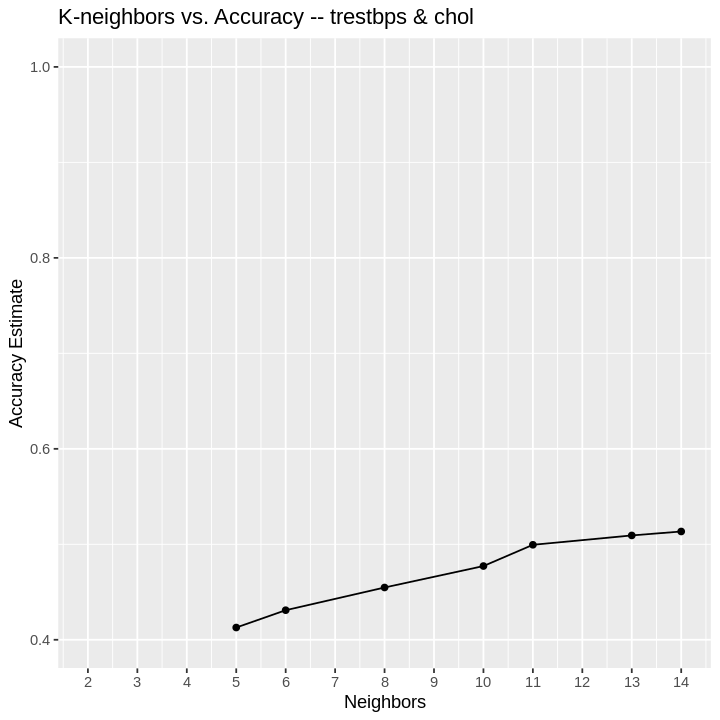

In [8]:
#10-fold cross-validation: trestbps and chol
heart_vfold <- vfold_cv(heart_disease_train, v = 10, strata = target)

vfold_metrics <- workflow() |>
                  add_recipe(heart_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = heart_vfold) |>
                  collect_metrics()

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")


knn_results <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = 10) |>
       collect_metrics()
knn_results
# do we use 10 K values or 5?

accuracies <- knn_results |> 
       filter(.metric == "accuracy")

options(repr.plot.width = 6, repr.plot.height = 6)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "K-neighbors vs. Accuracy -- Trestbps & Chol") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

best_k <- accuracies |>
arrange(desc (mean))|>
head(1)|>
pull(neighbors)
best_k

<font size = 3> **Step 2.4:** The graph showned above generated by the code visually represents how accuracy changes with different K values in the KNN model. By plotting the number of neighbors against the mean accuracy, it allows for an assessment of the optimal K value to make accurate predictions with the given predictors; the optimal number of neighbors (K) is 14 for the model with resting blood pressure and cholesterol levels. </font>


<font size= "4"> **Step 3.0:** Predicting heart disease type by cholesterol levels, and age  </font>

<font size = 3> **Step 3.1:** We are creating a second model aiming to predict heart disease type by cholesterol levels and age. As with the first set of data, we coded a summary table with the mean values and then displayed the data in two scatter plots; the first showing the relationship of the variables with each data point colored to a different type of heart disease and the second showing the relationship of the variables for each type of heart disease separately. </font>

In [9]:
table_data_2 <- heart_disease_train |>
select("chol", "age", "target")

# number of obs
num_obs_2 <- nrow(table_data_2)
heart_disease_obs <- table_data_2 |> 
group_by(target) |>
summarise(count = n(),
         percentage = n()/num_obs*100)

# Age and cholesterol relationship
heart_chol_age <- table_data_2 |>
group_by(target) |>
summarise(mean_age = mean(age), 
          mean_chol = mean(chol))
heart_chol_age

heart_chol_age_chart <- table_data_2 |>
group_by(target) |>
summarise(across(c(chol, age)))

target,mean_age,mean_chol
<fct>,<dbl>,<dbl>
0,52.60656,244.6967
1,56.12195,245.2683
2,58.15385,256.0000
3,56.61538,247.5769
4,58.00000,250.6000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


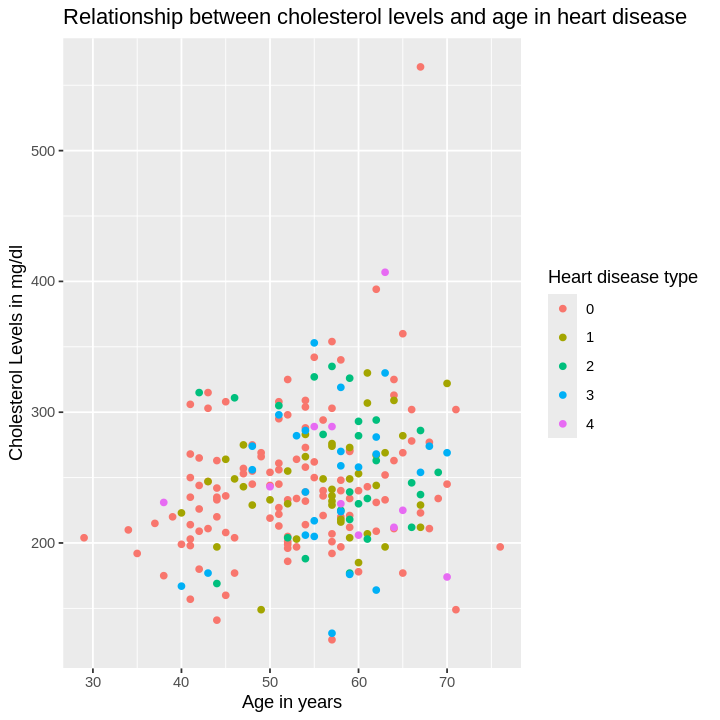

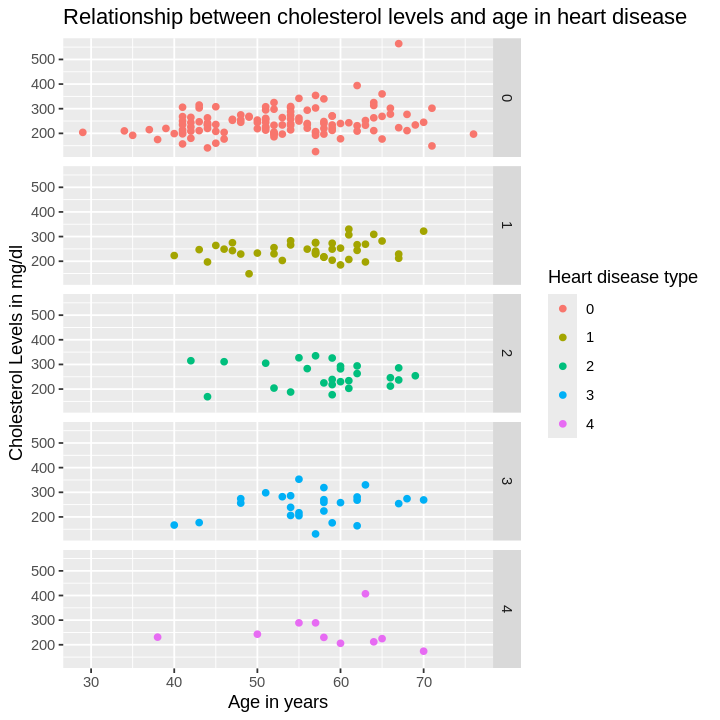

In [10]:
# Age and cholesterol relationship plot
heart_age_plot<- ggplot(heart_chol_age_chart, aes(x = age, y= chol, color= target)) +
geom_point()+labs(x = "Age in years", 
                  y = "Cholesterol Levels in mg/dl", 
                  title = "Relationship between cholesterol levels and age in heart disease", 
                  color = "Heart disease type")
heart_age_plot

heart_age_many<- ggplot(heart_chol_age_chart, aes(x = age, y= chol, color= target)) +
geom_point()+labs(x = "Age in years", 
                  y = "Cholesterol Levels in mg/dl", 
                  title = "Relationship between cholesterol levels and age in heart disease", 
                  color = "Heart disease type")+
facet_grid(rows=vars(target))
heart_age_many

**Graph analysis:** Unfortunately, from a visual inspection of both graphs, there seems to be no clear trend or correlation between age and cholesterol levels across the different types of heart disease. Cholesterol levels are scattered across the age range for each type of heart disease, suggesting that within this dataset, cholesterol levels do not consistently increase or decrease with age in a way that is dependent on heart disease type. 

<font size = 3> **Step 3.2:** We then created a KNN classification model for the second set of variables, age and cholesterol levels. The estimated accuracy of this model is approximately 46.15%. This level of accuracy suggests that the model is not highly reliable in its current form. Similar to the first model, the consequences of relying on this model could be significant in clinical settings where accurate diagnosis and patient categorization are critical. The ‘kap’ value being around 0.053 also further implies that there is minimal agreement between the model’s predictions and the actual classifications beyond what would be expected by chance. The 10-fold cross validation for these variables revealed that the optimal number of neighbors (K) is 15. </font>

In [11]:
# K-nn spec and fitting- chol
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
set_engine("kknn")|>
set_mode("classification")


heart_recipe_2 <- recipe(target~ age+chol, data = heart_disease_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

heart_fit_2 <- workflow()|>
add_recipe(heart_recipe_2)|>
add_model(knn_spec)|>
fit(data= heart_disease_train)


# Predict class labels for our test set- chol
heart_test_predictions_2 <- predict(heart_fit_2, heart_disease_test) |>
       bind_cols(heart_disease_test)

prediction_accuracy_2 <- heart_test_predictions_2 |>
         metrics(truth = target, estimate = .pred_class) 
prediction_accuracy_2

heart_mat_2 <- heart_test_predictions_2 |> 
       conf_mat(truth = target, estimate = .pred_class)
heart_mat_2

heart_test_predictions_2 |>
  precision(truth = target, estimate = .pred_class, event_level = "first")

# compute accuracy
acc_heart_2 <- heart_test_predictions_2 |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc_heart_2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.46153846
kap,multiclass,0.05345276


          Truth
Prediction  0  1  2  3  4
         0 34  8  8  6  1
         1  3  2  2  1  0
         2  2  2  0  1  1
         3  3  2  0  0  1
         4  0  0  0  1  0

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.1692982


[1] 0.4615385

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2



→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.3458333,10,0.01924874,Preprocessor1_Model1
2,roc_auc,hand_till,0.5262398,10,0.02235005,Preprocessor1_Model1
3,accuracy,multiclass,0.4182900,10,0.02037585,Preprocessor1_Model2
3,roc_auc,hand_till,0.5321609,10,0.02582709,Preprocessor1_Model2
5,accuracy,multiclass,0.4408550,10,0.02658280,Preprocessor1_Model3
5,roc_auc,hand_till,0.5368087,10,0.02224678,Preprocessor1_Model3
6,accuracy,multiclass,0.4360931,10,0.02524008,Preprocessor1_Model4
6,roc_auc,hand_till,0.5743637,10,0.02602629,Preprocessor1_Model4
7,accuracy,multiclass,0.4579004,10,0.02926003,Preprocessor1_Model5


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


[1] 15

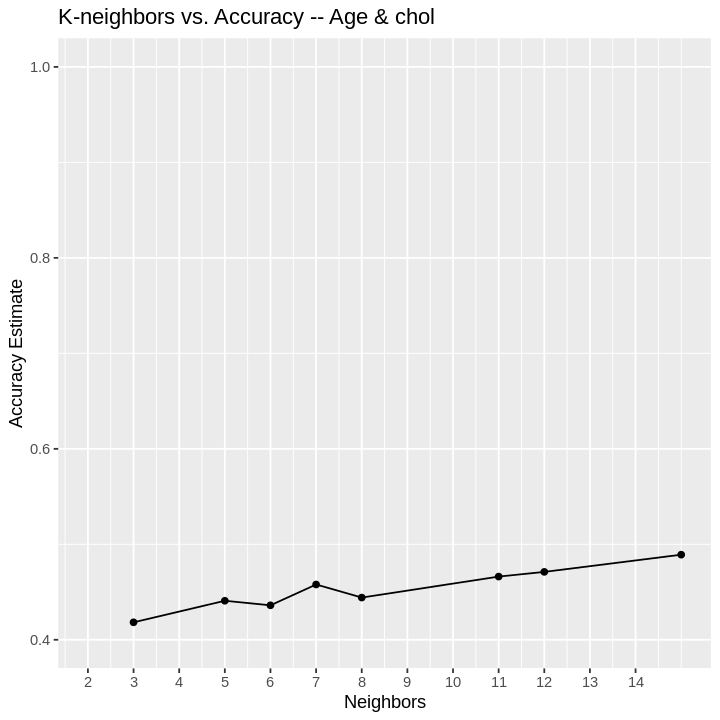

In [12]:
# 10-fold cross-validation: age and chol
heart_vfold <- vfold_cv(heart_disease_train, v = 10, strata = target)

vfold_metrics_2 <- workflow() |>
                  add_recipe(heart_recipe_2) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = heart_vfold) |>
                  collect_metrics()


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")


knn_results_2 <- workflow() |>
       add_recipe(heart_recipe_2) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = 10) |>
       collect_metrics()
knn_results_2


accuracies_2 <- knn_results_2 |> 
       filter(.metric == "accuracy")

options(repr.plot.width = 6, repr.plot.height = 6)
accuracy_versus_k_2 <- ggplot(accuracies_2, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "K-neighbors vs. Accuracy -- Age & Chol") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k_2

best_k_2 <- accuracies_2 |>
arrange(desc (mean))|>
head(1)|>
pull(neighbors)
best_k_2

<font size= "4"> **Step 4.0:** Predicting Heart Disease type with all numerical predictors </font>

<font size= "3"> **Step 4.1:** Because the accuracies in both models are not great, we decided to create a new model consisting of all the numerical values we have in the data set, to see if we can get a more accurate heart disease type predicting model. Just like we did above, we created a summary table with all the mean values of the variables. However, we can't create a scatter plot for this table, because each plot can only hold two variables so it would be redundant to create one for each paired combination.</font>

In [13]:
table_data_all <- heart_disease_train |>
select("chol", "age", "target", "trestbps", "thalach")

# number of obs
num_obs_all <- nrow(table_data_all)
heart_disease_obs_all <- table_data_all |> 
group_by(target) |>
summarise(count = n(),
         percentage = n()/num_obs*100)
heart_disease_obs_all

# All predictor relationship relationship
heart_all <- table_data_all |>
group_by(target) |>
summarise(mean_age = mean(age), 
          mean_chol = mean(chol),
         mean_trestbps = mean(trestbps),
         mean_th = mean(thalach))
heart_all

heart_all_chart <- table_data_all|>
group_by(target) |>
summarise(across(c(chol, age, trestbps, thalach)))


target,count,percentage
<fct>,<int>,<dbl>
0,122,54.222222
1,41,18.222222
2,26,11.555556
3,26,11.555556
4,10,4.444444


target,mean_age,mean_chol,mean_trestbps,mean_th
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.60656,244.6967,128.9836,157.9918
1,56.12195,245.2683,133.6341,144.0976
2,58.15385,256.0000,136.6923,132.5000
3,56.61538,247.5769,134.3846,130.1154
4,58.00000,250.6000,142.7000,140.1000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


<font size= "3"> **Step 4.2:** Although we don't have the plot, we still can created a KNN classification model all the variables. The estimated accuracy of this model is approximately 52.56%. This accuracy is better than both models we did before, but it is still moderately reliable. We then performed the 10-fold cross validation to find it's optimal accuracy and k-value. </font>

In [14]:
# K-nn spec and fitting- all
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
set_engine("kknn")|>
set_mode("classification")


heart_recipe_all <- recipe(target~., data = table_data_all)|>
step_scale(all_predictors())|>
step_center(all_predictors())

heart_fit_all <- workflow()|>
add_recipe(heart_recipe_all)|>
add_model(knn_spec)|>
fit(data= table_data_all)


# Predict class labels for our test set- all
heart_test_predictions_all <- predict(heart_fit_all, heart_disease_test) |>
       bind_cols(heart_disease_test)

prediction_accuracy_all <- heart_test_predictions_all |>
         metrics(truth = target, estimate = .pred_class) 


heart_mat_all <- heart_test_predictions_all |> 
       conf_mat(truth = target, estimate = .pred_class)
heart_mat_all

heart_test_predictions_all |>
  precision(truth = target, estimate = .pred_class, event_level = "first")

# compute accuracy
acc_heart_all <- heart_test_predictions_all |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc_heart_all

          Truth
Prediction  0  1  2  3  4
         0 34  8  3  6  2
         1  3  3  4  1  0
         2  2  0  2  1  0
         3  2  2  0  1  0
         4  1  1  1  0  1

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.3528473


[1] 0.525641

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x4





neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.3769786,10,0.03279757,Preprocessor1_Model1
1,roc_auc,hand_till,0.4980065,10,0.01845027,Preprocessor1_Model1
3,accuracy,multiclass,0.3985884,10,0.02469847,Preprocessor1_Model2
3,roc_auc,hand_till,0.5255598,10,0.01627651,Preprocessor1_Model2
5,accuracy,multiclass,0.4664879,10,0.01745559,Preprocessor1_Model3
5,roc_auc,hand_till,0.5431494,10,0.02014835,Preprocessor1_Model3
7,accuracy,multiclass,0.4680736,10,0.01692107,Preprocessor1_Model4
7,roc_auc,hand_till,0.5444506,10,0.02238797,Preprocessor1_Model4
9,accuracy,multiclass,0.4994048,10,0.02569811,Preprocessor1_Model5


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


[1] 14

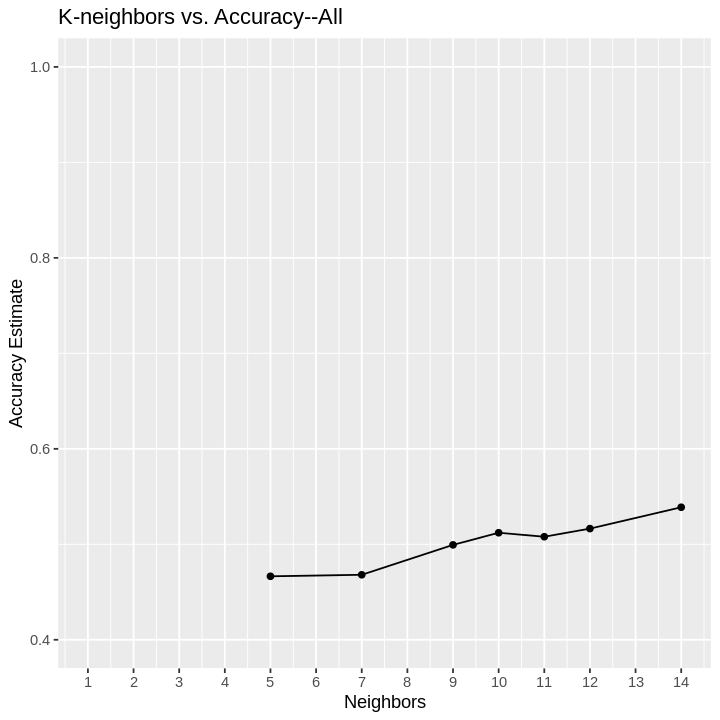

In [15]:
# 10-fold cross-validation: all
heart_vfold <- vfold_cv(table_data_all, v = 10, strata = target)

vfold_metrics_all <- workflow() |>
                  add_recipe(heart_recipe_all) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = heart_vfold) |>
                  collect_metrics()


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")


knn_results_all <- workflow() |>
       add_recipe(heart_recipe_all) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = 10) |>
       collect_metrics()

knn_results_all

accuracies_all <- knn_results_all |> 
       filter(.metric == "accuracy")

options(repr.plot.width = 6, repr.plot.height = 6)
accuracy_versus_k_all <- ggplot(accuracies_all, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "K-neighbors vs. Accuracy -- All") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k_all

best_k_all <- accuracies_all |>
arrange(desc (mean))|>
head(1)|>
pull(neighbors)
best_k_all

<font size= "4"> **Step 5:** Conclusion--finding the best k-values </font>

<font size = 3> To have a better understanding of the accuarcy of eachh model, we created a compairation between all the model's K-neighbors vs. Accuracy graph. 

<font size= "3"> For the cholesterol levels and resting heart rate model, by looking at the graph and the cross-validation value, we can see that for k=14, the accuracy is the highest with a mean of approximately 0.513 and a relatively low standard error. Also, the accuracy appears to improve consistently as k increases, with no clear plateau observed within the range tested. Furthermore, the accuracy estimate continues to trend upwards from k=2 to k=14 without leveling off, suggesting that the model has not yet reached the point of diminishing returns within the tested k-range. Based on these observations, k=14 seems to be the best choice among the values tested since it has the highest mean accuracy and the improvement in accuracy doesn't appear to have plateaued. 

<font size= "3"> **Best k-value and corresponding accuracy: K = 14, 51.3%**

<font size= "3">For the cholesterol levels and age model, considering these points and examining the table, we can see that for k=15, the model has the highest accuracy (mean of approximately 0.489) with a relatively low standard error. Also, the AUC is the highest at this k-value, indicating the model's good performance in distinguishing between the classes.

<font size= "3"> **Best k-value and corresponding accuracy: K = 15, 48.9%**

<font size= "3">For the All numerical Variables model, we can see from the plot that there is a plateau at k = 10 which has a relatively high accuracy compared to lower k-values. Also the increase in accuracy is minimal after 10 and even decrease at k = 11. The standard error is also relatively low. 

<font size= "3">**Best k-value and corresponding accuracy: K = 10, 51.2%**

<font size= "3"> In conlusion, the best model should be the All numerical Variables model. This model has similar accuracy as the cholesterol levels and resting heart rate model but with a smaller standard error and higher AUC value making it more reliable. One interesting thing about all three models is that there best k-values are all very high, we think this meay because that we have an imbalanced datasets with type 0 heart disease being over 50% and tpye 4 heart disease only 4% so we need more neighbors to help us to determine the type. This can also be caused by the noises in the data, as we can see in the graph analysis, there does not have a clear trend between different variables, therefore, instead of relying on a few nearest points, higher k-value can provide a much more accurate estimation. However, while a high "k" value can reduce variance and overfitting, it can also increase the bias of the model. This means the model may become too generalized and not capture the nuances in the data, potentially leading to underfitting.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


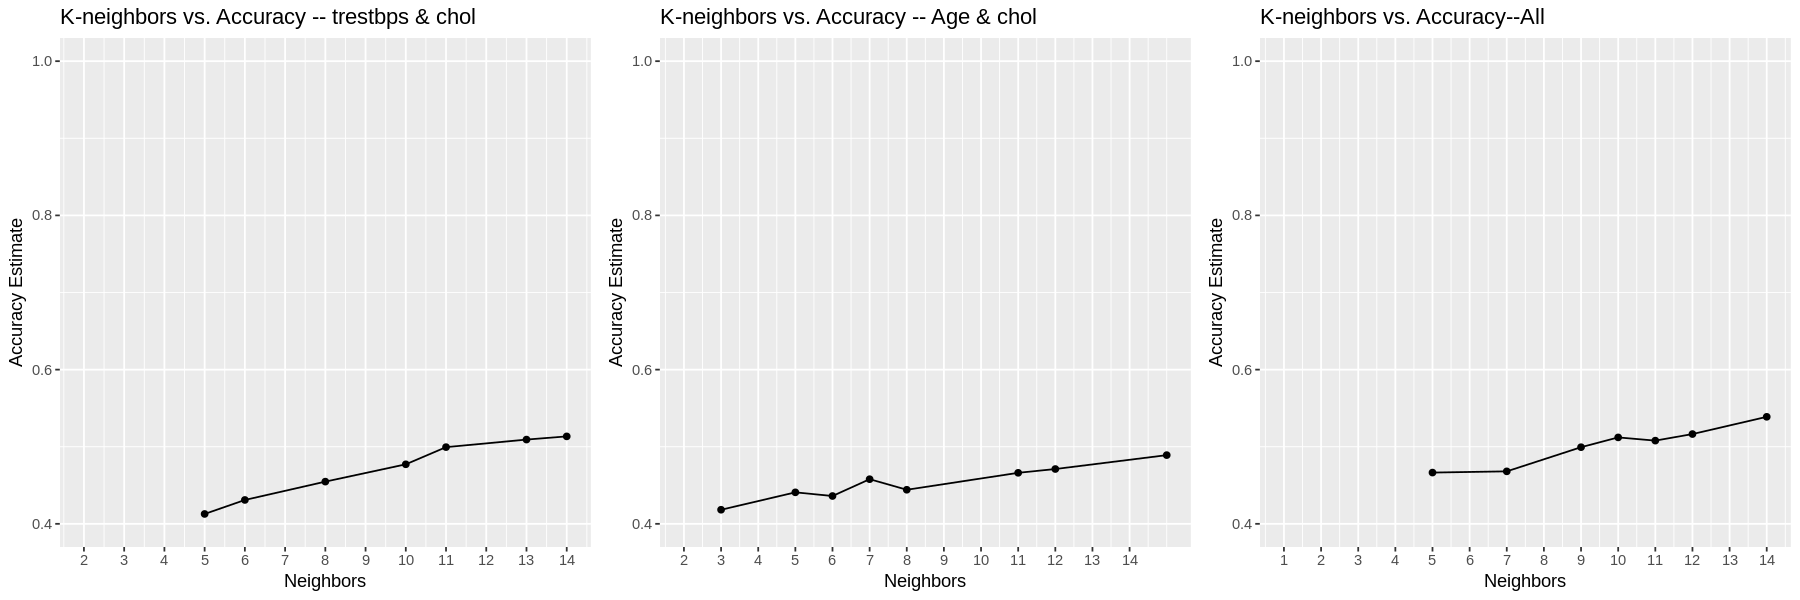

In [16]:
options(repr.plot.width = 15, repr.plot.height = 5)
plot_grid(accuracy_versus_k, accuracy_versus_k_2, accuracy_versus_k_all, ncol = 3)

<font size= "4"> Discussion </font>

The results of our analysis offers insights into predicting heart disease types based on patient characteristics such as age, cholesterol levels, and resting blood pressure. We first examined the relationship between cholesterol levels and resting blood pressure across different heart disease types. Our visualizations unveiled distinct patterns, indicating the pivotal role these variables play in distinguishing between various heart conditions.

Furthermore, we employed K-nearest neighbor (KNN) classification models for pairs and combinations of different numerical variables as predictors to explore different models. 

Additionally, cross-validation analysis suggested that the employment of multiple numerical variables of age, cholesterol level, maximum heart rate, and resting blood pressure maximizes the accuracy of the classification models. However, there are limitations within our proposed model. It is important to acknowledge that the overall accuracy of our models remains moderate, implying the presence of other factors not considered in our analysis contributes to classification of the type of heart disease. Further, we used a singular dataset with limited data; there were only 14 variables measured, with limiting applicable numerical variables. Hence, our model may only represent and make predictions based on the limited data in the dataset, which may compromise the ability of the model in applications with larger populations with more comprehensive data presented.

In conclusion, our analysis articulates the potential of machine learning techniques in predicting heart disease based on patient symptoms and characteristics. Future research is required to explore the inclusion of additional variables, such as genetic markers or lifestyle factors, to enhance the predictive capability of the models. Additionally, developed KNN classification models should also be coupled with categorical variables for symptoms, such as chest pain, to optimize the accuracy of prediction and adaptability of models in various contexts of application. These advancements could significantly improve our ability to diagnose and manage heart disease more effectively, as well as applications in low-prevalence and low-income regions with a deficiency in sufficient medical care (Bösner, 2010).

<font size= "4"> Reference </font>

Heart Disease. (2022). Mayo Clinic. Retrieved March 8, 2024, from https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

5 Heart Numbers You Need to Know. (n.d.). Johns Hopkins Medicine. Retrieved March 8, 2024, from https://www.hopkinsmedicine.org/health/wellness-and-prevention/5-heart-numbers-you-need-to-know

Bösner, S., Boesner, S., Becker, A., Abu Hani, M., Keller, H., Soennichsen, A. C., Haasenritter, J., Karatolios, K., Schaefer, J. R., Baum, E., & Donner-Banzhoff, N. (2010). Accuracy of symptoms and signs for coronary heart disease assessed in primary care. British Journal of General Practice, 60(575), e246-e257. https://doi.org/10.3399/bjgp10X502137